### Plot statistics derived from the MC matrices

In [1]:
# Libraries
library(ggraph)
library(ggpubr)
library(igraph)
library(tidyverse)
library(RColorBrewer)
library(repr)

Loading required package: ggplot2


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


── Attaching packages ──────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ─────────────────────────── tidyverse_conflicts() ──
✖ dplyr::as_data_frame() masks tibble::as_data_frame(), igraph::as_data_frame()
✖ purrr::compose()       masks igraph::compose()
✖ tidyr::crossing()      masks igraph::crossing()
✖ dplyr::filter()        masks stats::filter()
✖ dplyr::groups()        masks igraph::groups()
✖ dplyr::lag()           masks stats::lag()
✖ purrr::simplify()      masks igraph::simplify()



#### Loading data

In [2]:
root = "/home/vinicius/funcog/gda"

results = "/home/vinicius/storage1/projects/GrayData-Analysis/figures/"

metric = "coh"

aMC = read.csv(
  paste(
    c(root,
      "/Results/lucy/meta_conn/aMC_",
      metric,
      ".csv"),
    collapse="")
)

Q = read.csv(
  paste(
    c(root,
      "/Results/lucy/meta_conn/Q_",
      metric,
      ".csv"),
    collapse="")
)

nu = read.csv(
  paste(
    c(root,
      "/Results/lucy/meta_conn/nu_",
      metric,
      ".csv"),
    collapse="")
)

aMC$X <- NULL
Q$X <- NULL
nu$X <- NULL

data_summary <- function(x) {
  m <- median(x)
  ymin <- m-sd(x)
  ymax <- m+sd(x)
  return(c(y=m,ymin=ymin,ymax=ymax))
}

#### Plotting features

In [3]:
# Time labels
times.labs <- c("P", "S", "D1", "D2", "Dm")
names(times.labs) <- 0:4
# Frequency labels
freqs.labs <- c("3 Hz", "11 Hz", "19 Hz", "27 Hz", "35 Hz",
                "43 Hz", "51 Hz", "59 Hz", "67 Hz", "75 Hz")
names(freqs.labs) <- c(3, 11, 19, 27, 35,
                       43, 51, 59, 67, 75)

#### Average meta-connectivity

In [4]:
p1 <- aMC %>% ggplot(aes(x=as.factor(times), y=MC)) + 
  geom_boxplot(aes(color=as.factor(times), fill=as.factor(times)),
              alpha=.6,
              show.legend = F) +
  facet_wrap(~freqs, ncol=5, scales = "free_y",
             labeller = labeller(freqs = freqs.labs)) +
  #stat_summary(fun.data=data_summary, 
  #             geom="pointrange",
  #             color="black") +
  scale_x_discrete(labels=times.labs) +
  theme_minimal() + 
  theme(plot.title = element_text(hjust=0.5),
        axis.text.x = element_text(angle = 45, hjust=1)) +
  labs(x = "", y="Avg. meta-connectivity")

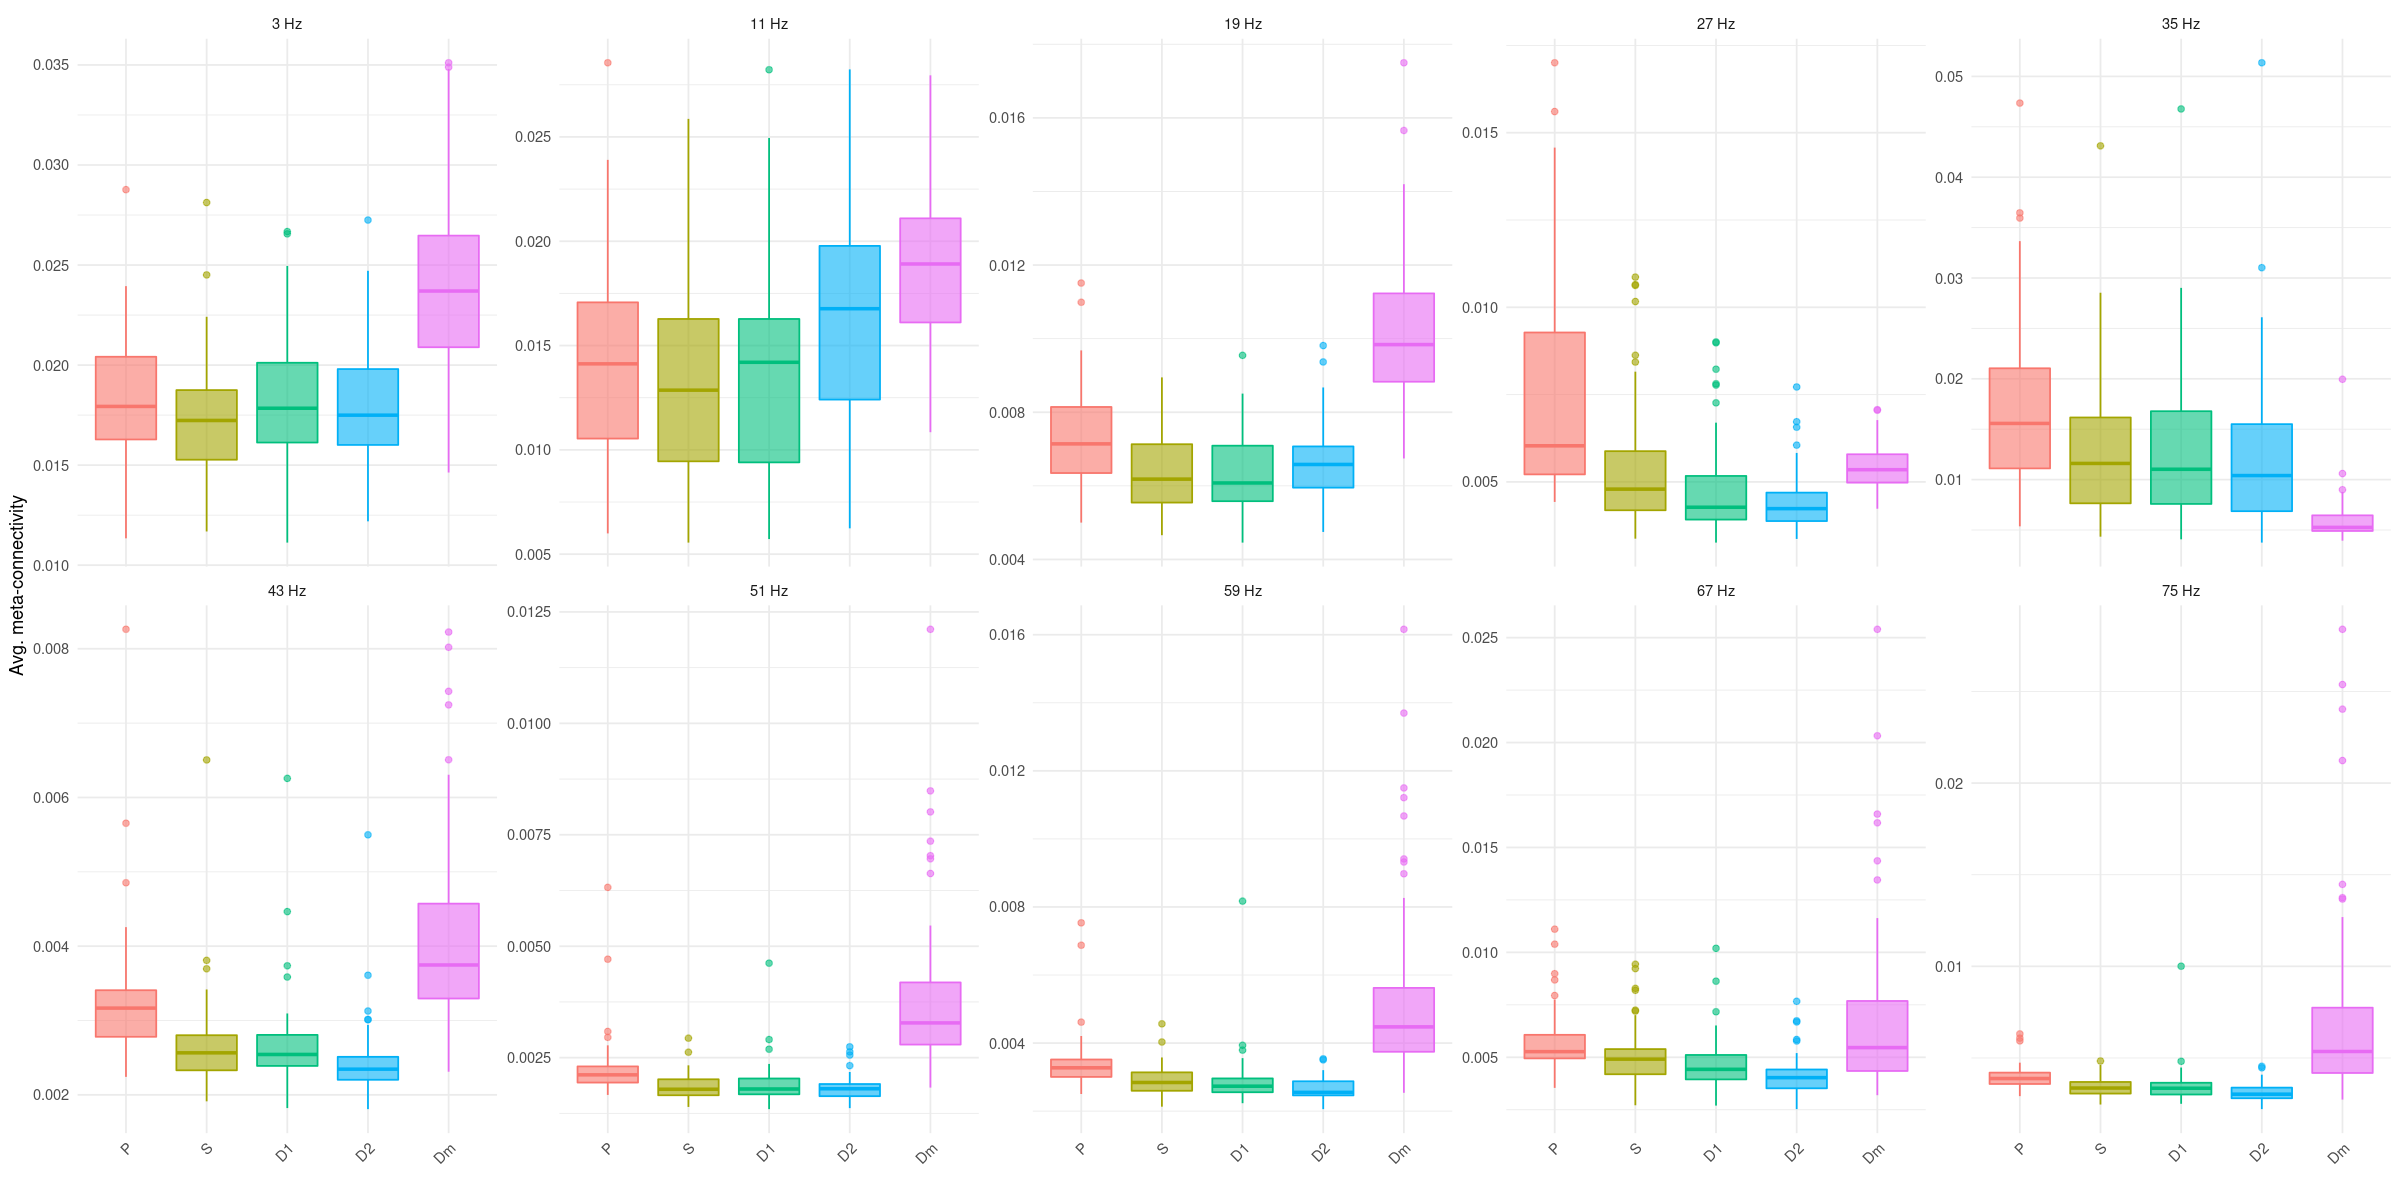

In [5]:
options(repr.plot.width=20, repr.plot.height=10)
p1

#### Viscosity

In [6]:
p2 <- nu %>% ggplot(aes(x=as.factor(times), y=nu)) + 
  geom_boxplot(aes(color=as.factor(times), fill=as.factor(times)),
               alpha=.6,
               show.legend = F) +
  facet_wrap(~freqs, ncol=5, scales = "free_y",
             labeller = labeller(freqs = freqs.labs)) +
  #stat_summary(fun.data=data_summary, 
  #             geom="pointrange",
  #             color="black") +
  scale_x_discrete(labels=times.labs) +
  theme_minimal() + 
  theme(plot.title = element_text(hjust=0.5),
        axis.text.x = element_text(angle = 45, hjust=1)) +
  labs(x = "", y="Viscosity")

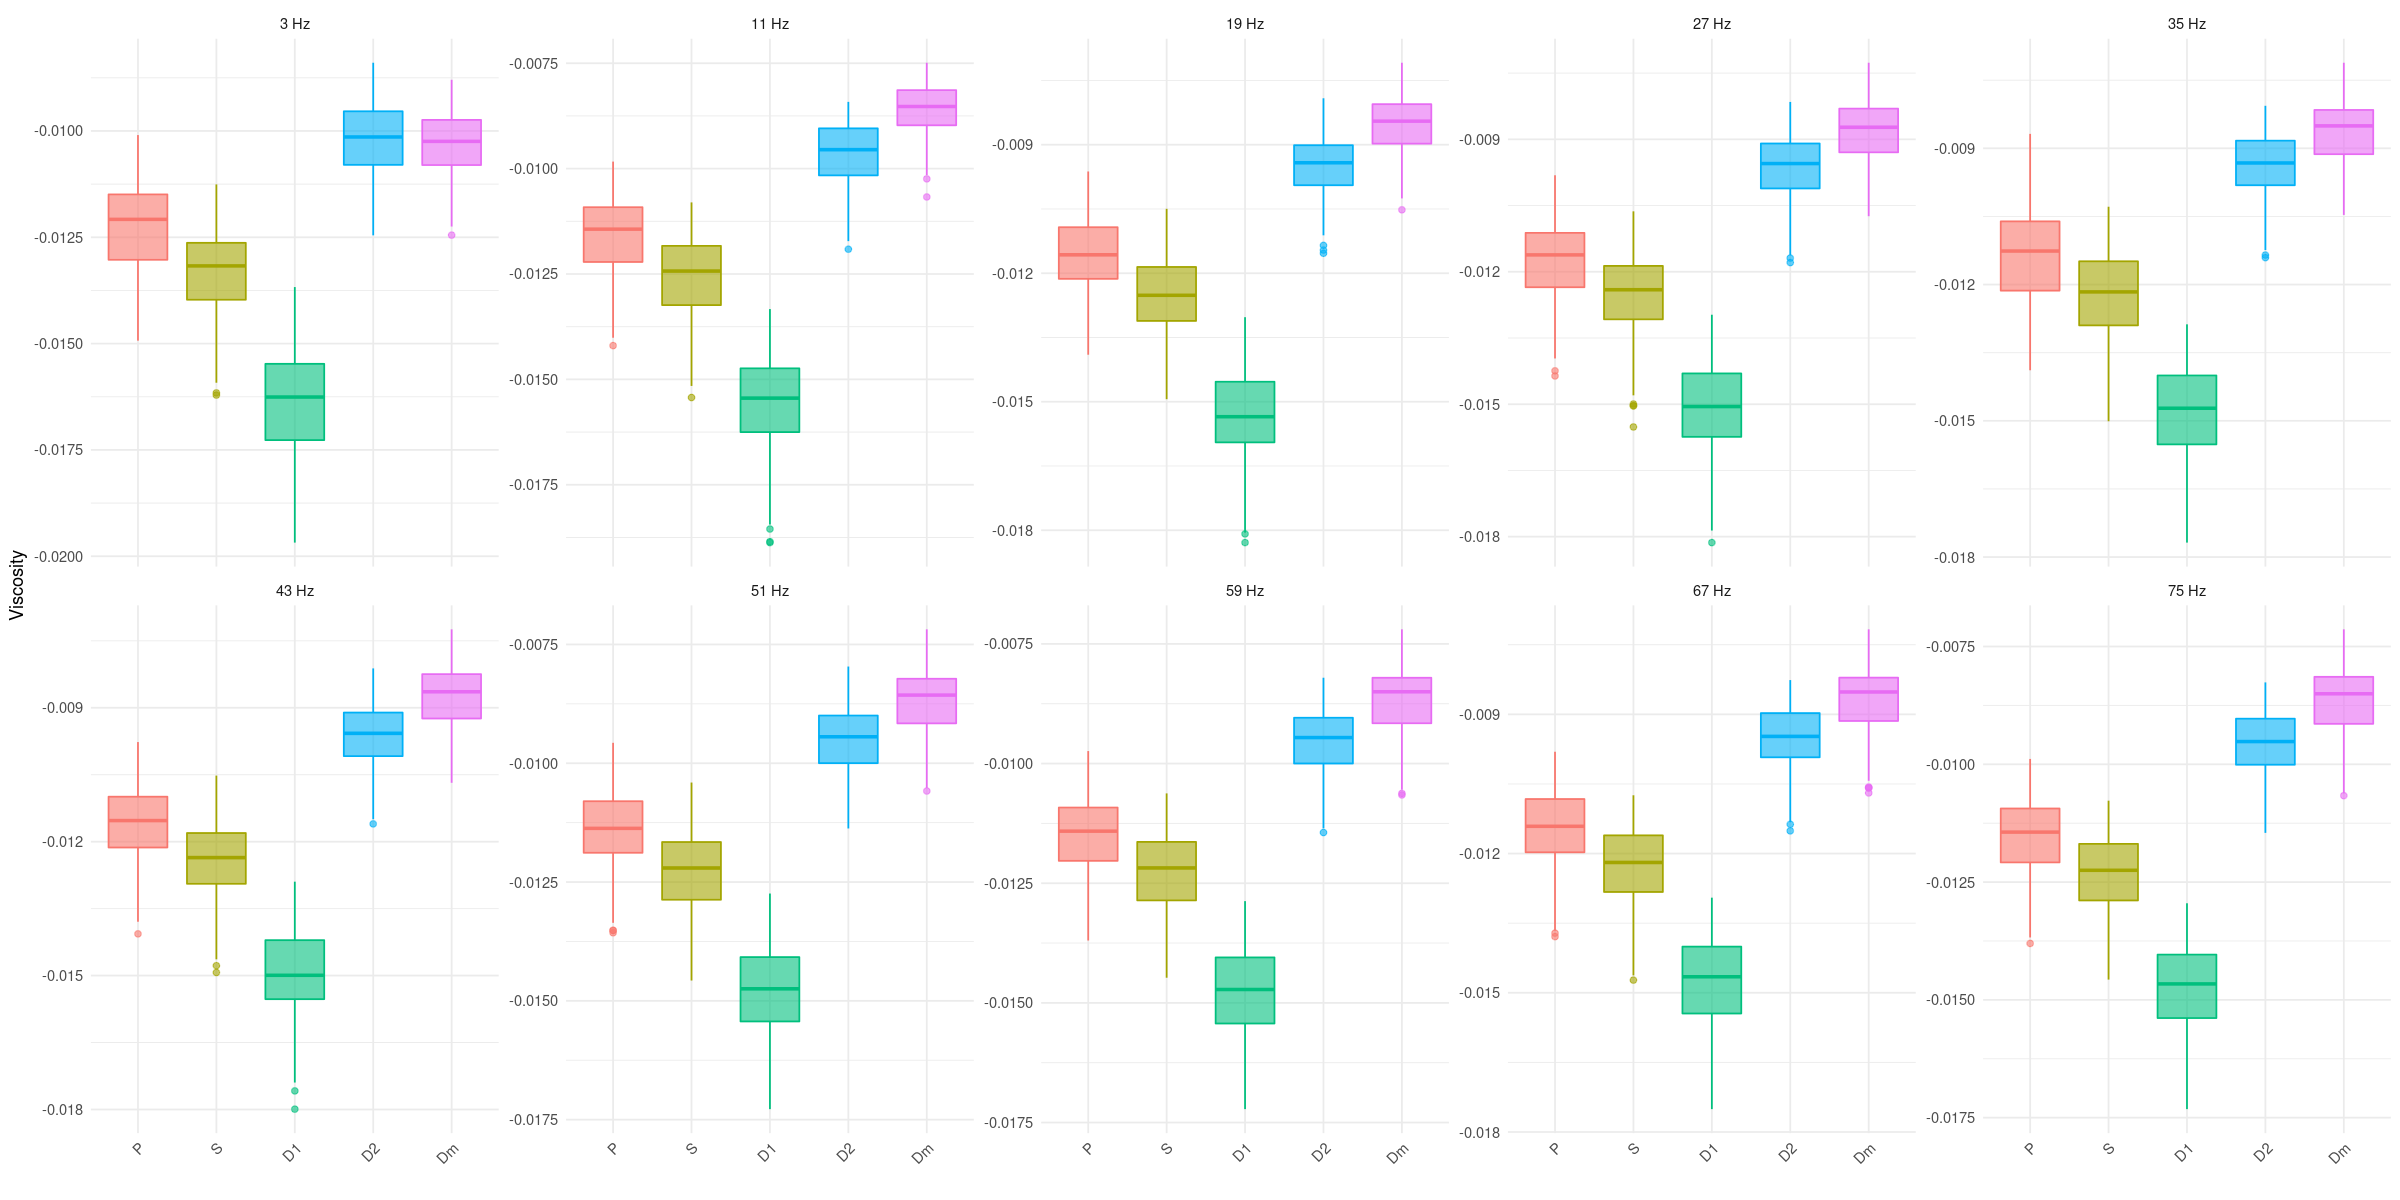

In [7]:
options(repr.plot.width=20, repr.plot.height=10)
p2

#### Modularity

In [8]:
p3 <- Q %>% ggplot(aes(x=as.factor(times), y=Q)) + 
  geom_boxplot(aes(color=as.factor(times), fill=as.factor(times)),
               alpha=.6,
               show.legend = F) +
  facet_wrap(~freqs, ncol=5, scales = "free_y",
             labeller = labeller(freqs = freqs.labs)) +
  #stat_summary(fun.data=data_summary, 
  #             geom="pointrange",
  #             color="black") +
  scale_x_discrete(labels=times.labs) +
  theme_minimal() + 
  theme(plot.title = element_text(hjust=0.5),
        axis.text.x = element_text(angle = 45, hjust=1)) +
  labs(x = "", y="Modularity")

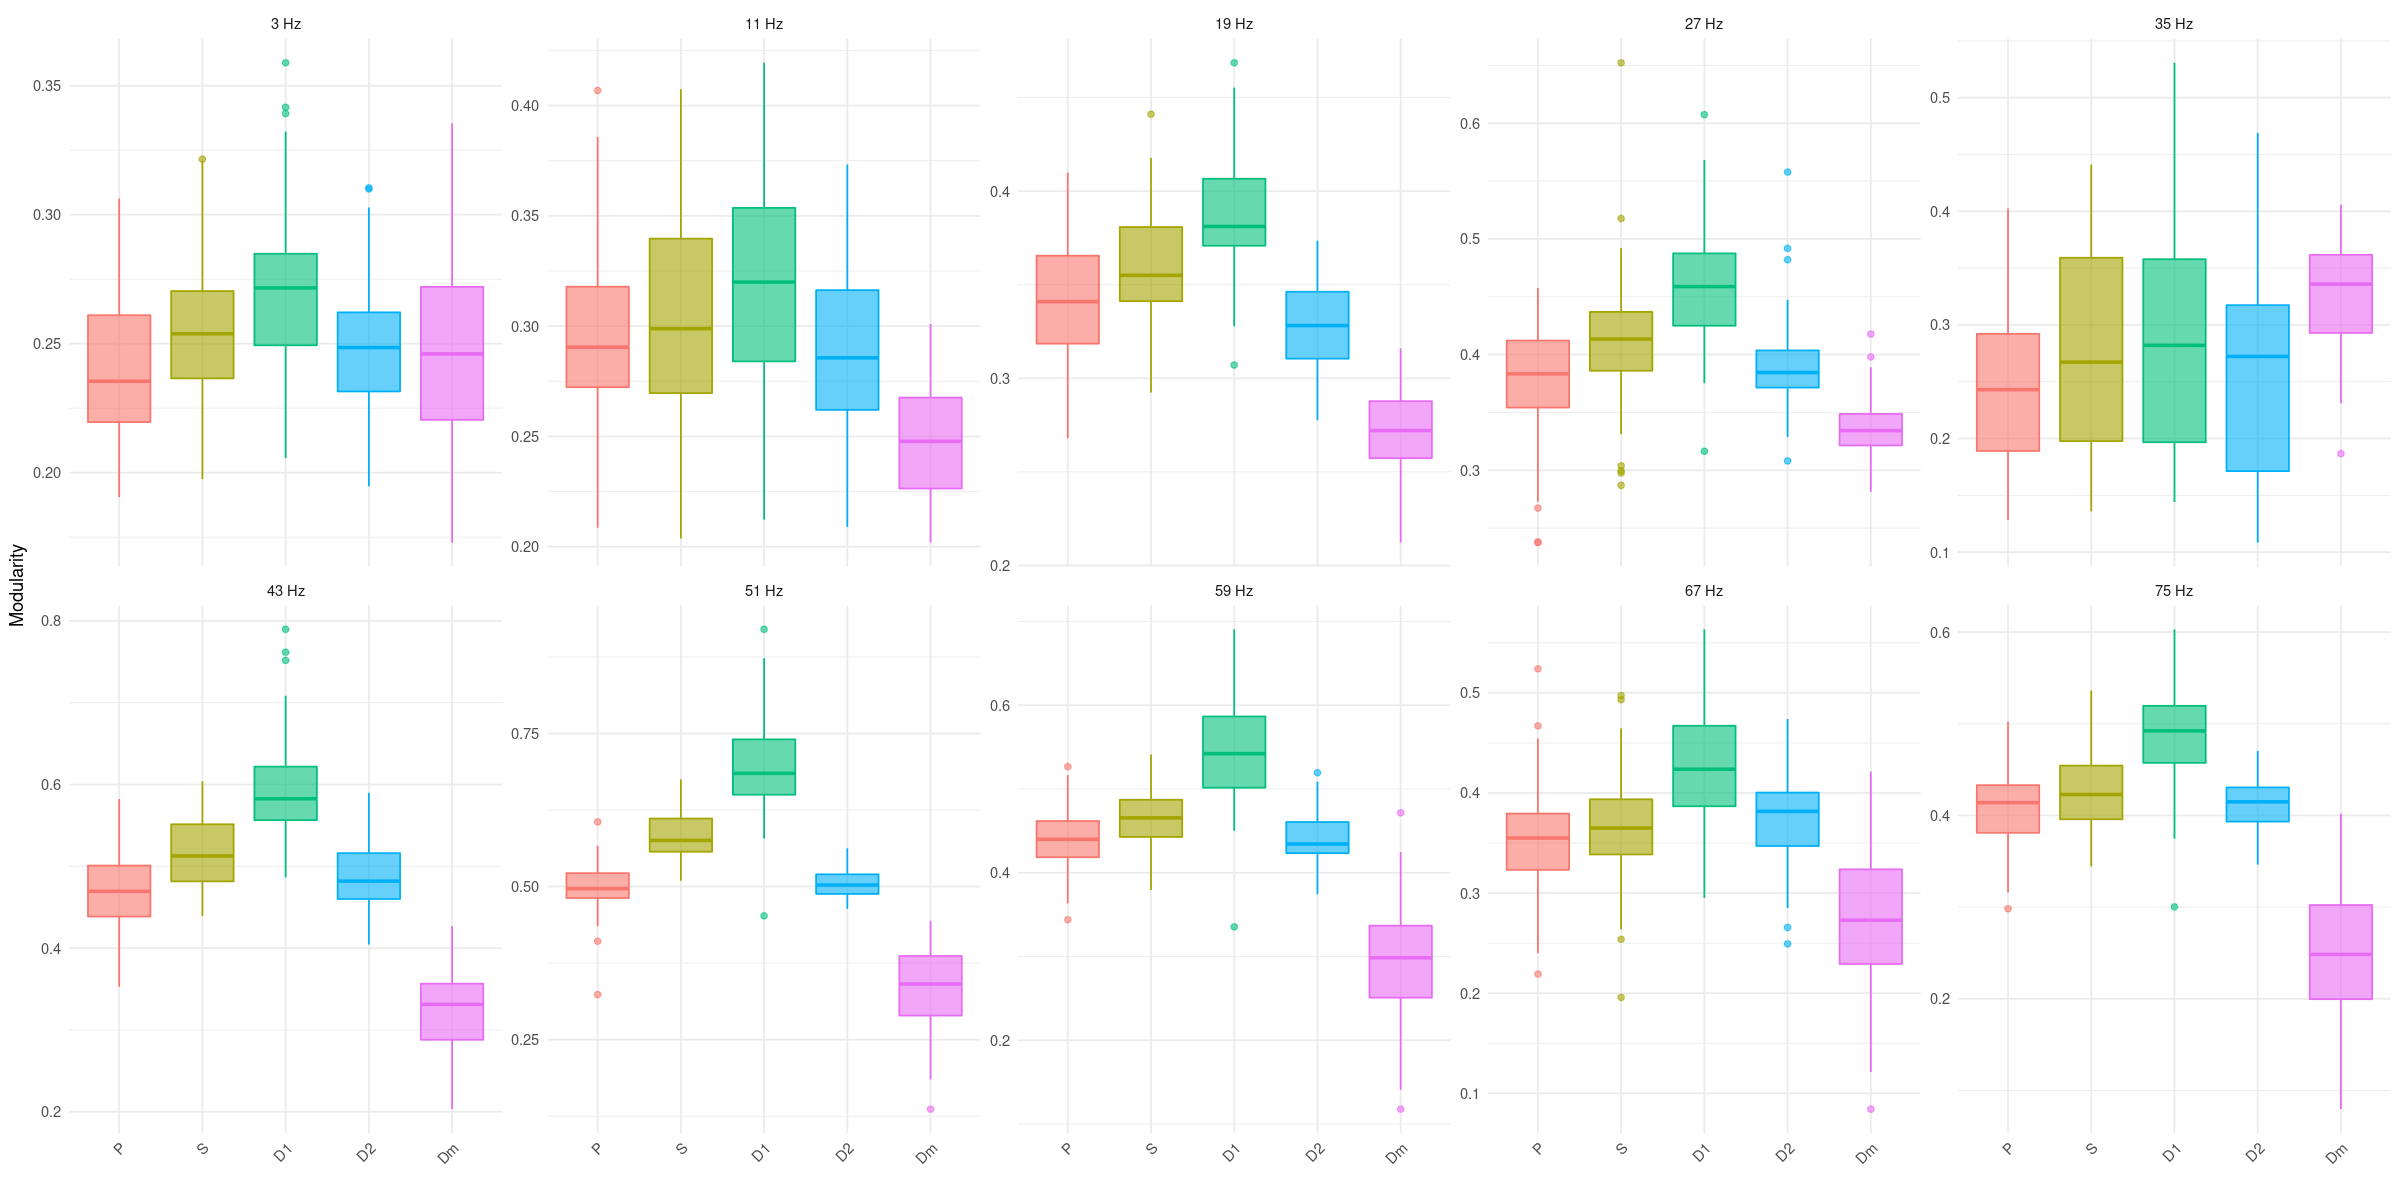

In [9]:
options(repr.plot.width=20, repr.plot.height=10)
p3

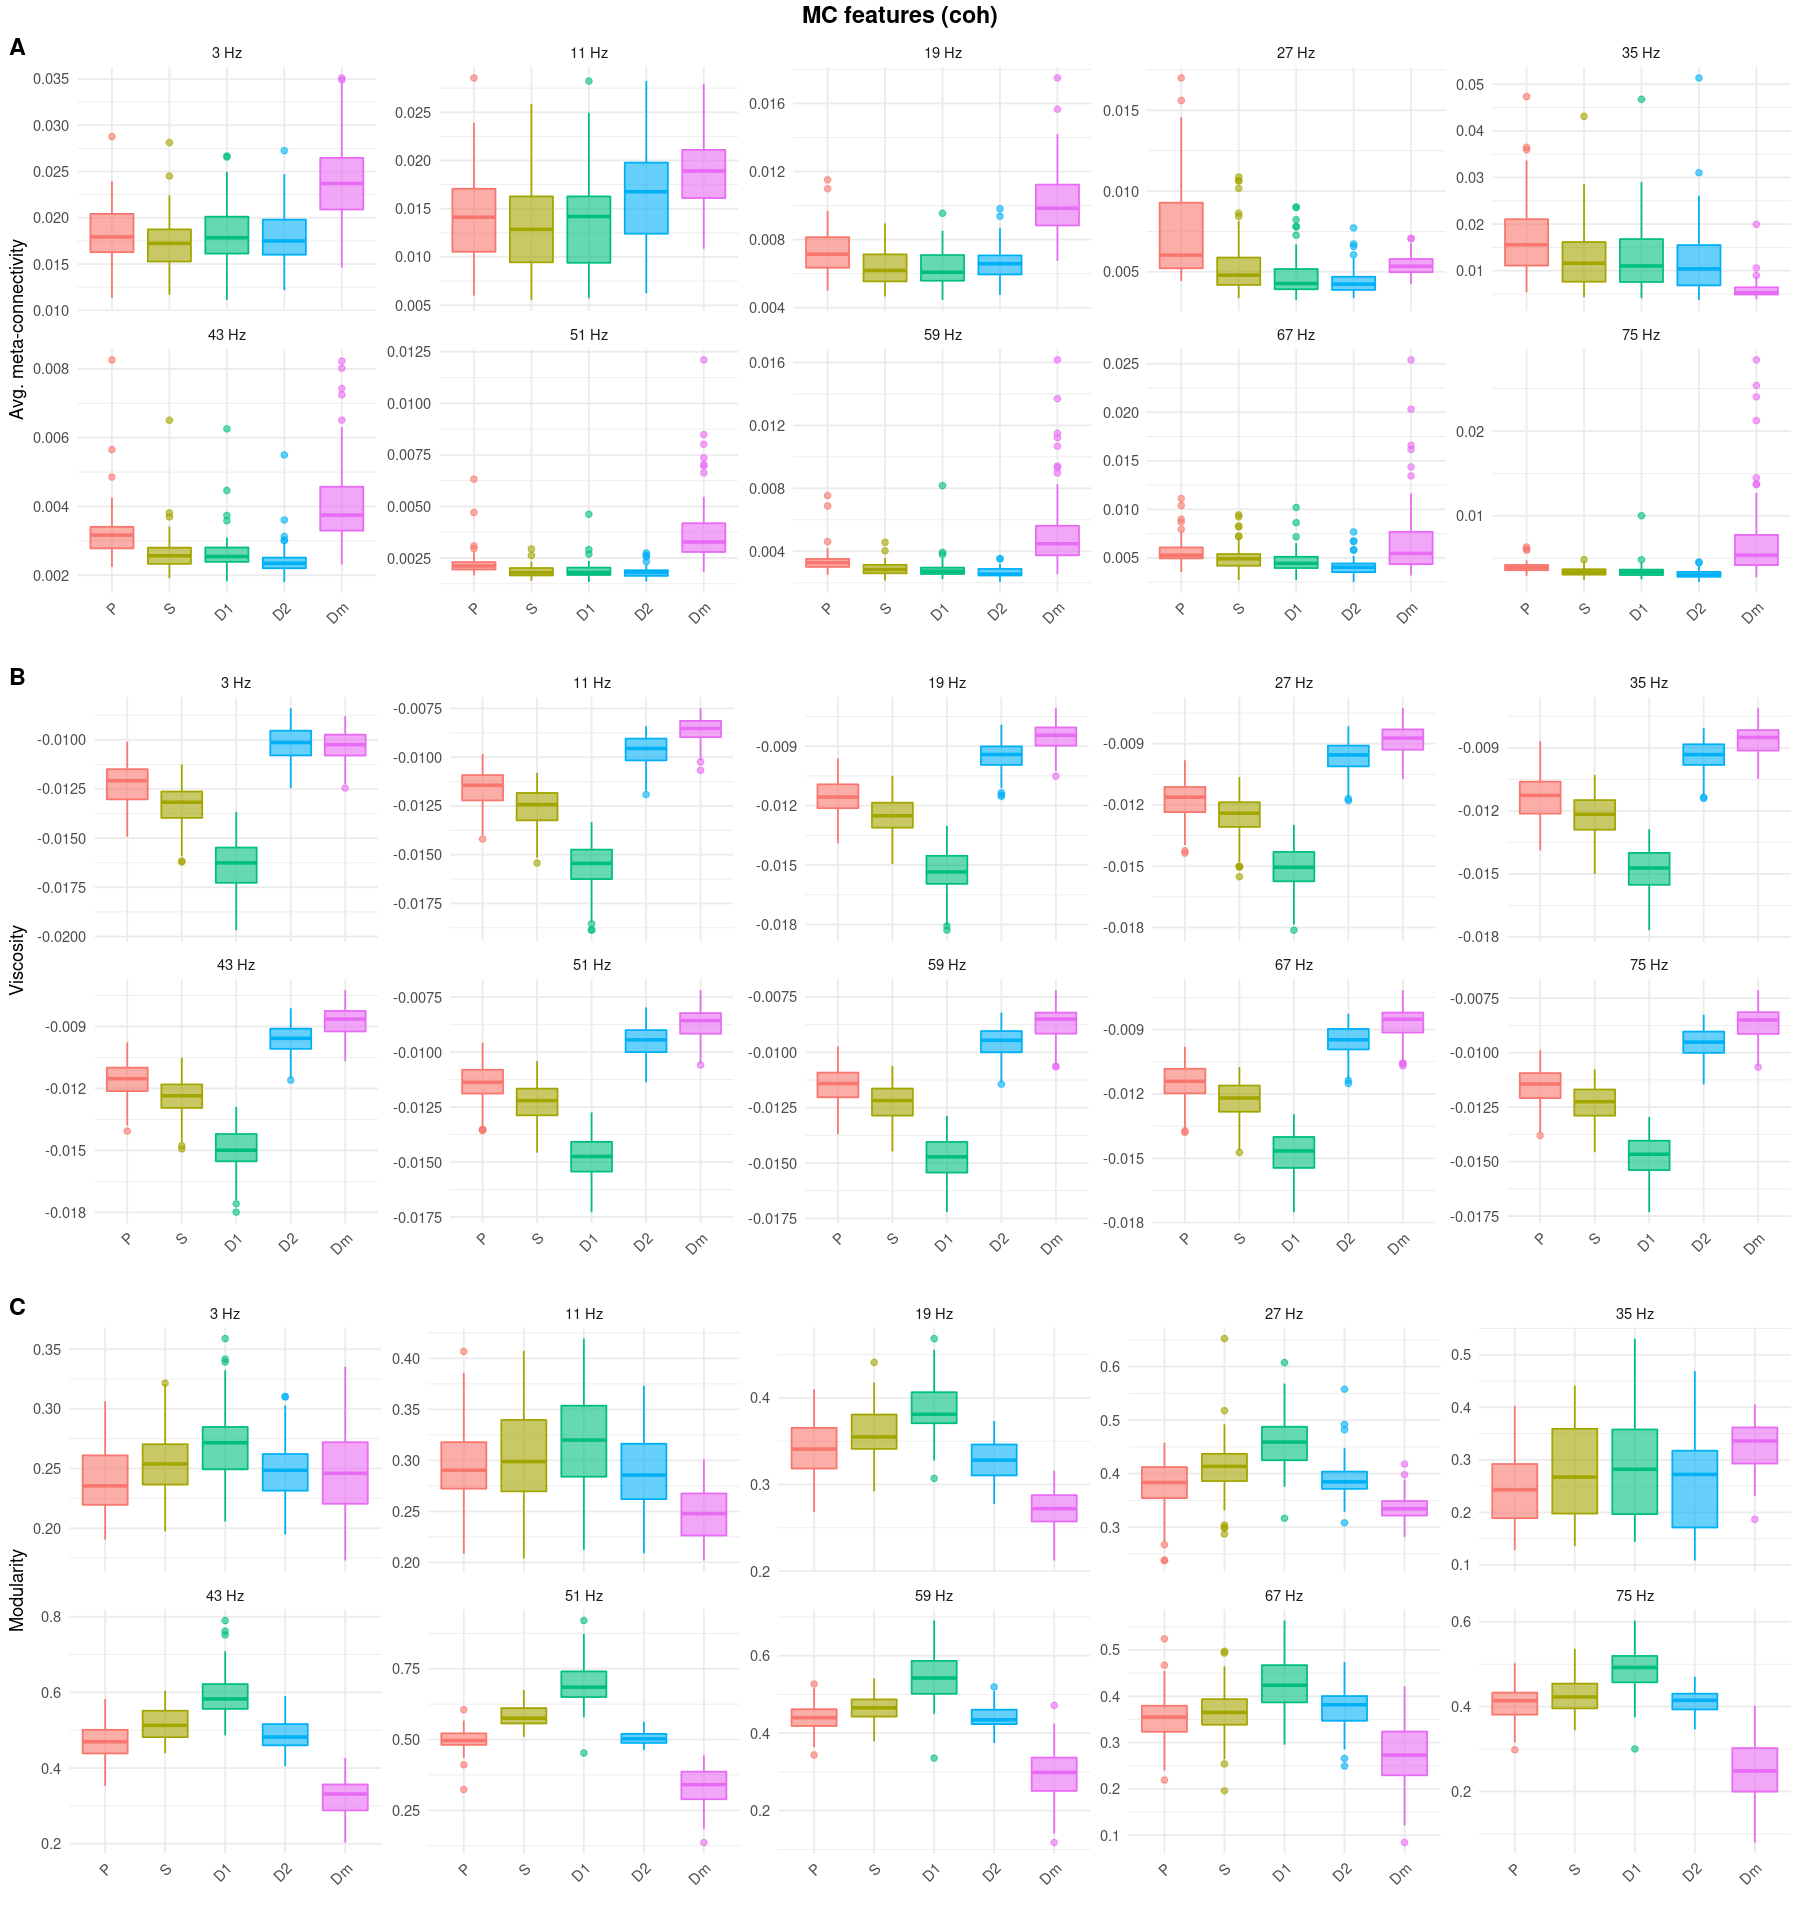

In [15]:
title = paste(c("MC features (", metric, ")"), collapse = "")

options(repr.plot.width=15, repr.plot.height=16)
fig <- ggarrange(p1, p2, p3,
          ncol = 1, nrow = 3,
          labels = c("A", "B", "C")) 
annotate_figure(fig,
                top = text_grob(title,
                                color = "black",
                                face = "bold", size = 14))

ggsave(
  paste(
    c(results,
      "/mc_features_",
      metric,
      ".png"),
    collapse = ""),
  width = 10, height = 12)